## Описание проекта
«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Описание таблиц

- model — количество рейсов для каждой модели самолетов model в сентябре 2018 года
- city - среднее количество рейсов, прибывающих в город city за день в августе 2018 года

## План

- импортируем файлы;
- изучим данные в них;
- проверим типы данных на корректность;
- выберем топ-10 городов по количеству рейсов;
- построим графики: 
    - <a href='#Шаг 1'>модели самолетов и количество рейсов</a>
    - <a href='#Шаг 2'>города и количество рейсов</a>
    - <a href='#Шаг 3'>топ-10 городов и количество рейсов</a>
- сделаем выводы по каждому из графиков, поясним результат.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

from io import BytesIO
import requests

#### Импортируем файлы, изучим данные в них и проверим типы данных на корректность

In [2]:
model = pd.read_csv('/datasets/query_1.csv')
model.info()
model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


- Не вижу смысла брать sample когда таблица небольшая, выводим всю таблицу
- Типы данных адекватны их смыслу
- Ошибок и пропусков нет

In [3]:
city = pd.read_csv('/datasets/query_3.csv')
city.info()
city.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
55,Новый Уренгой,8.290323
2,Анапа,2.161290
83,Улан-Удэ,1.608696
87,Усть-Илимск,2.870968
59,Омск,3.290323
21,Иваново,1.000000
43,Москва,129.774194
12,Владивосток,3.000000
32,Краснодар,3.903226
25,Казань,7.741935


- берем sample так как в таблице 101 строка
- Типы данных адекватны их смыслу
- Ошибок и пропусков нет

#### Выберем топ-10 городов по количеству рейсов

Добавим еще столбец cat, для анализа всех городов и топ 10

In [4]:
top_city = city.sort_values(by = 'average_flights', ascending = False).head(10).round(2)
top_city['cat'] = 'Top'
top_city

,city,average_flights,cat
43,Москва,129.77,Top
70,Санкт-Петербург,31.16,Top
54,Новосибирск,17.32,Top
33,Красноярск,11.58,Top
20,Екатеринбург,11.32,Top
67,Ростов-на-Дону,10.19,Top
63,Пермь,10.13,Top
10,Брянск,10.00,Top
74,Сочи,9.61,Top
84,Ульяновск,9.58,Top


## Построим графики:
- модели самолетов и количество рейсов
- города и количество рейсов
- топ-10 городов и количество рейсов;

<a id='Шаг 1'></a>
### Модели самолетов и количество рейсов

Модели самолетов и количество рейсов отсортируем по количеству полетов в порядке убывания для наглядности

In [27]:
model = model.sort_values(by = 'flights_amount', ascending = False)
model

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


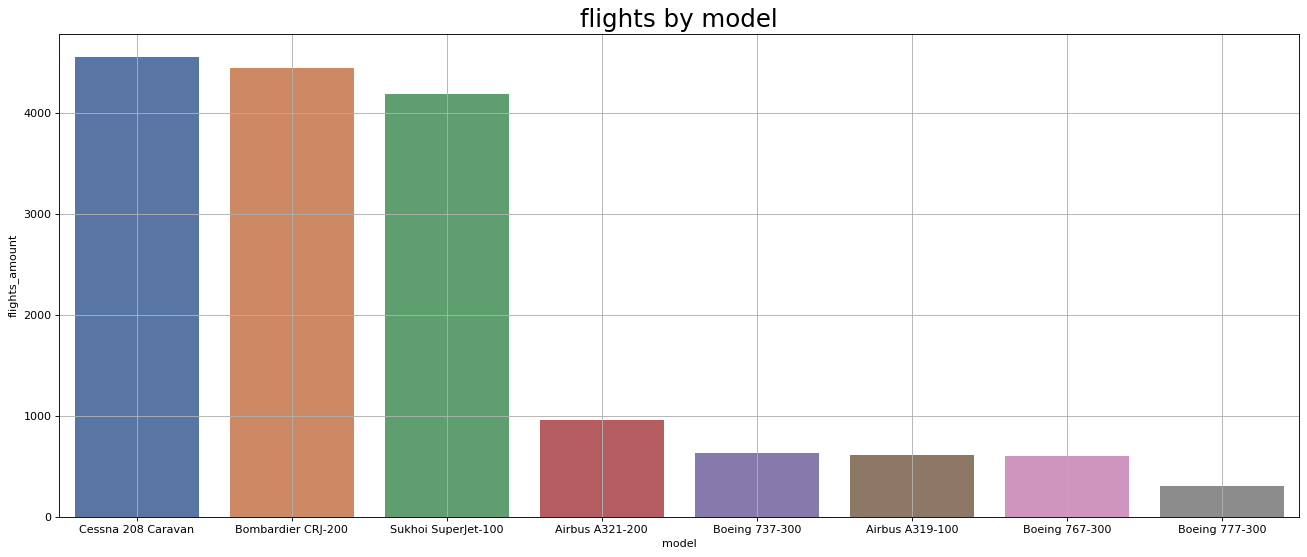

In [7]:
plt.figure(figsize=(20,8), dpi= 80)
sns.barplot(x='model', y='flights_amount', palette="deep", data = model)
plt.title('flights by model', fontsize=22)
plt.grid()
plt.show()

Из таблицы и графика по количеству перелетов в месяц мы можем сделать вывод, что самолеты компании cessna самые востребованные, но давайте посмотрим на пассажиропоток

Для этого мы воспользуемся внешней таблицей с данными по вместительности самолетов и компаниям производителям

In [8]:
spreadsheet_id = '<1BD4MMsG0p8lJGdLu-FhtpQ-Sk4jon14ylqQK0-pcETg>'
file_name = 'https://docs.google.com/spreadsheets/d/1BD4MMsG0p8lJGdLu-FhtpQ-Sk4jon14ylqQK0-pcETg/export?format = xls'.format(spreadsheet_id)
r = requests.get(file_name)
stat = pd.read_excel(BytesIO(r.content))
stat

,model,capacity,company
0,Cessna 208 Caravan,14,Cessna
1,Bombardier CRJ-200,50,Bombardier
2,Sukhoi SuperJet-100,100,Sukhoi
3,Airbus A321-200,220,Airbus
4,Boeing 737-300,149,Boeing
5,Airbus A319-100,124,Airbus
6,Boeing 767-300,375,Boeing
7,Boeing 777-300,550,Boeing


Воспользуемся функцией слияние для наших таблиц по полю "model"

In [9]:
aircrafts = model.merge(stat, how = 'inner', on = ['model'])
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
model             8 non-null object
flights_amount    8 non-null int64
capacity          8 non-null int64
company           8 non-null object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


Проверим, что все сработало корректно и типы данных соответсвуют смыслу данных

Далее посчитаем пассажиропоток, который обеспечивают модели самолетов из нашей выборки

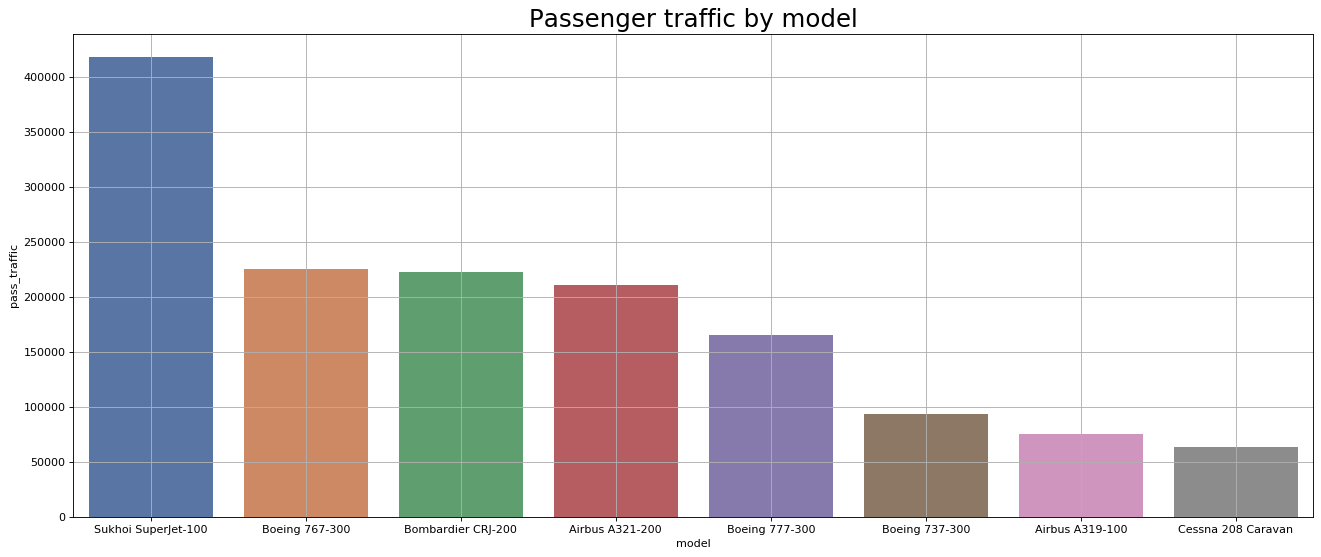

In [28]:
aircrafts['pass_traffic'] = aircrafts['flights_amount'] * aircrafts['capacity']
aircrafts.sort_values(by = 'pass_traffic', ascending = False, inplace = True)

plt.figure(figsize=(20,8), dpi= 80)
sns.barplot(x='model', y='pass_traffic', palette="deep", data = aircrafts)
plt.title('Passenger traffic by model', fontsize=22)
plt.grid()
plt.show()


Видим, что лидер по количеству перелетов теперь на дне таблицы с пассажиропотоком 64К людей в месяц, а новый лидер - Sukhoi SuperJet-100 с пассажиропотоком 418,5К пассажиров в месяц, но не совсем справедливо считать пассажиропоток отдельно по моделям самолетов, так как у компании "Сухой" всего одна модель подходящая для гражданской авиации, поэтому сгруппируем данные по компаниям производителям

In [13]:
company = aircrafts.groupby('company')['pass_traffic'].sum().sort_values(ascending = False).reset_index()
company['share'] = company['pass_traffic']/company['pass_traffic'].sum()
company.round(2)

,company,pass_traffic,share
0,Boeing,483870,0.33
1,Sukhoi,418500,0.28
2,Airbus,286468,0.19
3,Bombardier,222300,0.15
4,Cessna,63798,0.04


После группировки по производителям видим, что компания, обеспечивающая наибольший пассажиропоток - Boeing, каждый третий пассижир будет лететь судном компании Boeing, и лишь каждый 25ый самолетом Cessna

Text(0.5, 1.0, 'Passenger traffic by companies')

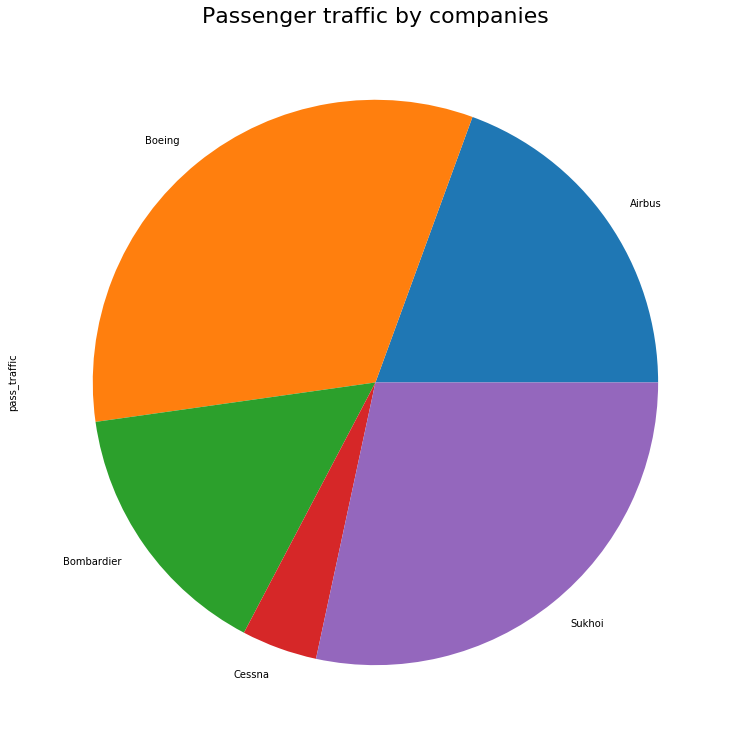

In [14]:
company.groupby('company')['pass_traffic'].sum().plot.pie(y='pass_traffic', figsize=(13, 13))
plt.title('Passenger traffic by companies', fontsize=22)

### Вывод

- Чаще всего в воздух поднимаются самолеты модели Cessna 208 Caravan (4557 раз в месяц)
- Самый большой пассажиропоток приходится на Sukhoi SuperJet-100 (418,5К пассажиров в месяц)
- Компания производитель, обеспечивающая наибольший пассажиропоток - Boeing (484К пассажиров в месяц)

<a id='Шаг 2'></a>
### Города и количество рейсов

Проанализируем города и количество рейсов. Отсортируем данные для удобства восприятияи  и построим график

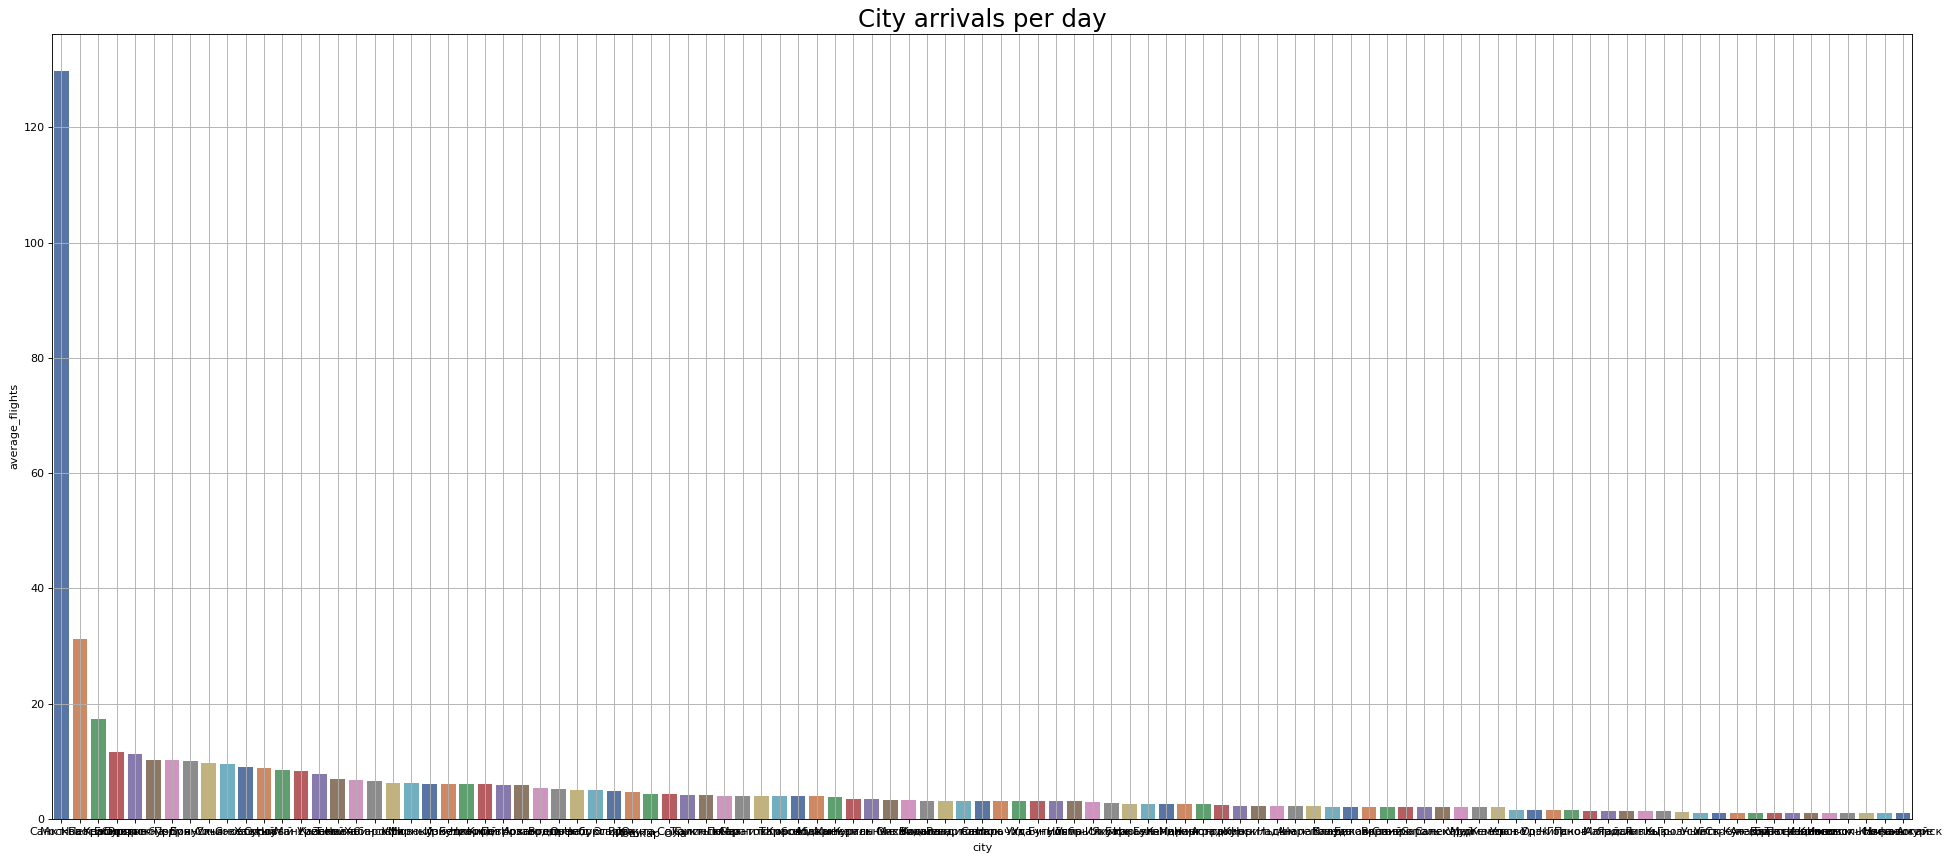

In [16]:
city = city.sort_values(by = 'average_flights', ascending = False)

plt.figure(figsize=(30,13), dpi= 80)
sns.barplot(x='city', y='average_flights', palette="deep", data = city)
plt.title('City arrivals per day', fontsize=22)
plt.grid()
plt.show()

Так как сложно анализировать огромное количество городов, на графике тоже смотрится не информативно, попробуем категоризовать города по округам. Для этого используем внешнюю таблицу со списком соответствий городов и округов

In [17]:
spreadsheet_id = '<1GnsoPc7i5lz18mfBfWZ3dWY2v7Nny09sur0Q8Nvdaqs>'
file_name = 'https://docs.google.com/spreadsheets/d/1GnsoPc7i5lz18mfBfWZ3dWY2v7Nny09sur0Q8Nvdaqs/export?format = xls'.format(spreadsheet_id)
r = requests.get(file_name)
list = pd.read_excel(BytesIO(r.content))
list.sample(5)

,city,region,district,population
674,Новоульяновск,Ульяновская область,Приволжский,16032
98,Берёзовский,Свердловская область,Уральский,51583
833,Светлогорск,Калининградская область,Северо-Западный,10775
181,Воронеж,Воронежская область,Центральный,889680
466,Краснознаменск,Московская область,Центральный,36057


Проверим, все ли сработало и посмотрим на данные.
Видим, что тип данных по населению подтянулся криво, приведем тип данных к INT

In [18]:
city_table = city.merge(list, how = 'inner', on = ['city'])
city_table.population =city_table.population.astype(int)
city_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 5 columns):
city               101 non-null object
average_flights    101 non-null float64
region             101 non-null object
district           101 non-null object
population         101 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


Сгруппируем данные по округам и посчитаем сумму средних

In [19]:
district = city_table.groupby('district')['average_flights'].sum().sort_values(ascending = False).reset_index().round()
district

,district,average_flights
0,Центральный,160.0
1,Уральский,86.0
2,Приволжский,82.0
3,Сибирский,71.0
4,Северо-Западный,66.0
5,Южный,41.0
6,Дальневосточный,34.0
7,Северо-Кавказский,15.0


Видим как сильно отстают Кавказ и Дальний Восток, а в лидерах, предсказуемо, Центральный округ

Посмотрим распределение на графике

Text(0.5, 1.0, 'District arrivals per day')

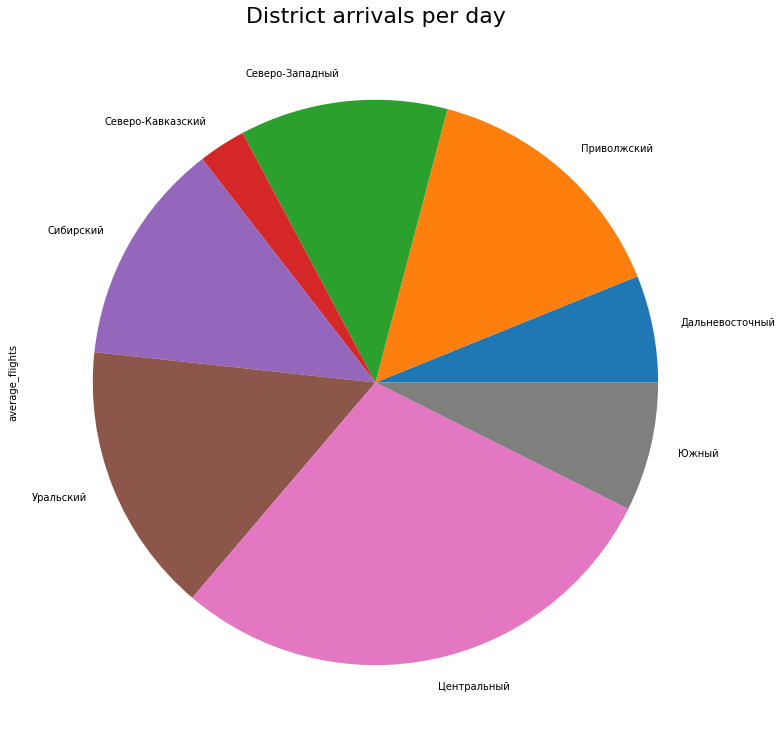

In [20]:
district.groupby('district')['average_flights'].sum().plot.pie(y='average_flights', figsize=(13, 13))
plt.title('District arrivals per day', fontsize=22)

Посмотрим, влияет ли население городов на количество полетов

In [21]:
city_table.corr()

,average_flights,population
average_flights,1.000000,0.954767
population,0.954767,1.000000


Видим очень устойчивую корреляцию населения и количества полетов, в целом, все ожидаемо

Далее посмотрим на распределние топ 10 городов по полетам и остальных регионов 

In [22]:
all_city = city.merge(top_city, how = 'left', on = ['city'])
all_city.fillna('Other', inplace = True)
all_city[['city','average_flights_x','cat']].groupby('cat').agg({'average_flights_x': ['sum', 'count']}).round().reset_index()

cat average_flights_x      
                       sum count
0  Other             304.0    91
1    Top             251.0    10

В среднем количество прибытий в города Топ 10 примерно равен величине остальных 91 городов

In [23]:
moscow_share = city.query('city == "Москва"')['average_flights'].sum()/city['average_flights'].sum()
moscow_share.round(2)

0.23

Доля Москвы во всех прилетах - 23% (почти ЧЕТВЕРТЬ от всех полетов) 

### Вывод

- Самый высокий среднедневной трафик предсказуемо у Центрального округа (160 прилетов в день), имеются ввиду только местные рейсы
- Самый низкий у Кавказа и Дальнего востока (15 и 34 прилета соответственно)
- Москва по количеству прилетов обгоняет либой федеральный округ (130 против 86 у ближайшего преследователя Уральского ФО)
- Москва занимает 23% всех прилетов
- Количество перелетов напрямую зависит от размера населения (корреляция 95%)
- Топ 10 городов примерно равны по количеству прилетов объему остальных 91 городов (251 прилет у топ10 против 304 по остальным)

<a id='Шаг 3'></a>
### Топ-10 городов и количество рейсов

Выберем из городов топ 10 и построим график с таблицей

In [24]:
top_city

,city,average_flights,cat
43,Москва,129.77,Top
70,Санкт-Петербург,31.16,Top
54,Новосибирск,17.32,Top
33,Красноярск,11.58,Top
20,Екатеринбург,11.32,Top
67,Ростов-на-Дону,10.19,Top
63,Пермь,10.13,Top
10,Брянск,10.00,Top
74,Сочи,9.61,Top
84,Ульяновск,9.58,Top


Text(0.5, 1.0, 'Top10 city arrivals per day')

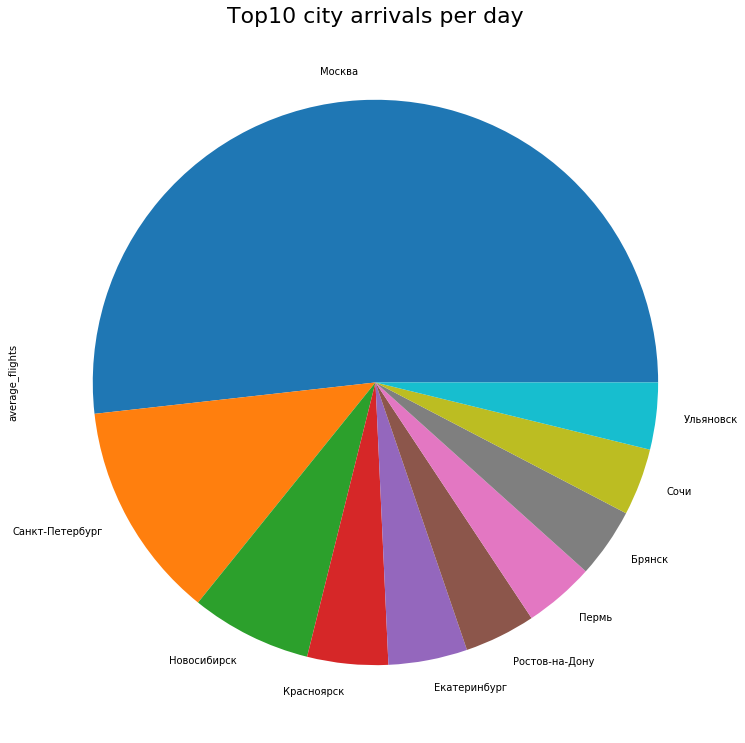

In [25]:
top_city.groupby('city')['average_flights'].sum().sort_values(ascending = False).plot.pie(y='average_flights', figsize=(13, 13))
plt.title('Top10 city arrivals per day', fontsize=22)

In [26]:
top_city['city_cat'] = np.where(top_city['city'] != 'Москва', 'Other', 'Moscow')
top_cat = top_city.groupby('city_cat')['average_flights'].sum().reset_index().round()
top_cat

,city_cat,average_flights
0,Moscow,130.0
1,Other,121.0


Видим, что в среднем Москва принимает больше рейсов в день, чем остальные участники топ 10 (130 рейсов в в день против 121 рейса у 9 остальных городов в сумме)

## Общий вывод

#### Проверка гипотезы о различии среднего спроса на билеты во время различных событий
Размер выборки не позволяет нам проверить гипотезу, о том что количество рейсов во время фестивалей увеличивается

#### Пассажиропоток: 

- Чаще всего в воздух поднимаются самолеты модели Cessna 208 Caravan (4557 раз в месяц)
- Самый большой пассажиропоток приходится на Sukhoi SuperJet-100 (418,5К пассажиров в месяц)
- Компания производитель, обеспечивающая наибольший пассажиропоток - Boeing (484К пассажиров в месяц)

#### Количество перелетов

- Количество перелетов напрямую зависит от размера населения (корреляция 95%)
- Самый высокий среднедневной трафик предсказуемо у Центрального округа (160 прилетов в день), имеются ввиду только местные рейсы
- Самый низкий у Кавказа и Дальнего востока (15 и 34 прилета соответственно)
- Топ 10 городов примерно равны по количеству прилетов объему остальных 91 городов (251 прилет у топ10 против 304 по остальным)

#### Москва

- Москва по количеству прилетов обгоняет либой федеральный округ (130 против 86 у ближайшего преследователя Уральского ФО)
- Москва занимает 23% всех прилетов
- Половину среднедневного объема перелетов делает Москва (121 рейс) 

#### Bonus track

Пассажир:
- в 33% и случаев летит на самолете компании Boeing и в 28% на Sukhoy
- в 30% случаев летит в Центральный ФО и в 23% случаев именно в Москву
